In [1]:
# Avrami fit model
def avrami(x, k, t):
    return 1-np.exp(-np.power(k*(x-t), 3))
# Piecewise Avrami fit model
def piecewise_avrami(x, k, t):
    if x < t:
        return 0
    else:
        return 1-np.exp(-np.power(k*(x-t), 3))
# Piecewise Avrami fit model with adjustable dimensionality
def n_piecewise_avrami(x, k, t, n):
    if x < t:
        return 0
    else:
        return 1-np.exp(-np.power(k*(x-t), n))

In [2]:
# Fit data sets to avrami equation
# Fit is performed to last 30 seconds of truncated data to not include as much baseline

#from scipy.optimize import curve_fit
#best_vals = [0 for x in range (0, len(adat))]#blobs_dog))]
#covar = [0 for x in range (0, len(adat))]#blobs_dog))]

#for i in range (0, len(adat)):#blobs_dog)):
#    best_vals[i], covar[i] = curve_fit(avrami, range(len(adat[i][-16:])), adat[i][-16:], p0=[0.1,4], maxfev=100000)


In [2]:
from scipy.optimize import curve_fit

In [3]:
# Some dsc data 
# Parameters from prior fit
# k = 0.00608
# t0 = 0
# n = 2.35675
data = [0,0.0000255962,0.0000651042,0.000118528,0.000187563,0.000274728,0.000381607,0.000510923,0.000664099,0.000842723,0.001051079,0.001291339,0.0015645,0.001877351,0.002226233,0.002620221,0.003058439,0.003539883,0.004068865,0.004651521,0.005288117,0.00597686,0.006729721,0.007544151,0.008415101,0.009353689,0.010354033,0.011407023,0.012530725,0.013697261,0.014925361,0.016209894,0.017542125,0.018929083,0.020380547,0.021888883,0.023444356,0.025064532,0.026741729,0.028465679,0.030256354,0.032104097,0.033997167,0.035969761,0.037975134,0.040049039,0.042180707,0.044358638,0.046596275,0.048908046,0.051282183,0.053704376,0.056203739,0.058765787,0.061375066,0.064064419,0.06681871,0.069622352,0.072528792,0.075469314,0.078497615,0.081597949,0.084752016,0.087979488,0.091301564,0.094700382,0.098156597,0.101713823,0.105352866,0.10905322,0.112862199,0.116760192,0.120723163,0.124823638,0.128966253,0.133226987,0.137581799,0.142002954,0.146516614,0.151151644,0.15587865,0.160669002,0.165584353,0.170598174,0.175679028,0.180882311,0.18616629,0.191487297,0.1969375,0.20238814,0.207936928,0.213548039,0.219181785,0.22486797,0.230639724,0.236460699,0.242293922,0.248211784,0.254181258,0.26016119,0.266213438,0.272292887,0.278358145,0.28451764,0.290624512,0.296785275,0.302958872,0.309105062,0.315258626,0.321456171,0.327660163,0.333830846,0.340038964,0.346243695,0.352403267,0.358588155,0.364761855,0.370890791,0.377086883,0.383201382,0.389342417,0.395470576,0.401546824,0.407604152,0.413676561,0.419725739,0.425712478,0.431707219,0.437677372,0.443587011,0.449503111,0.455389867,0.461211474,0.467071732,0.472827827,0.478580795,0.484292907,0.489927727,0.495517567,0.501095924,0.506632533,0.51209714,0.517555964,0.522976134,0.528327837,0.533674787,0.538984334,0.544225375,0.549491932,0.554661449,0.559829504,0.56496455,0.570035827,0.575074449,0.580109055,0.585105709,0.590033409,0.59495213,0.599833655,0.60465075,0.609460682,0.614231614,0.618935738,0.623658958,0.628287886,0.632906869,0.637489584,0.642010651,0.646497998,0.650977759,0.655422788,0.659807083,0.664182175,0.668520263,0.672796388,0.677064639,0.681298909,0.685472496,0.689661246,0.693764819,0.697856621,0.701912567,0.705909876,0.709871711,0.713824234,0.717746136,0.721612447,0.725469815,0.729295588,0.733066212,0.736826316,0.740555137,0.744230007,0.747913844,0.751518993,0.755111441,0.758670463,0.762175944,0.765648539,0.769108349,0.772534557,0.775908098,0.779269497,0.782597981,0.785875962,0.789144008,0.792381663,0.795570456,0.79876938,0.801902866,0.805027656,0.80812342,0.811169344,0.814185333,0.817190032,0.820165033,0.823093717,0.826009844,0.828896623,0.831738411,0.834568673,0.837370636,0.840127051,0.842886902,0.845583911,0.848268507,0.850927037,0.853543187,0.856134172,0.858715337,0.861270624,0.863784637,0.866288297,0.868765962,0.871201323,0.873624682,0.876020101,0.878372731,0.880725341,0.883020559,0.885297826,0.887541915,0.889737797,0.891898597,0.89403824,0.896144194,0.898203628,0.900241203,0.902244988,0.904203293,0.906138924,0.90803922,0.909894321,0.911739072,0.913528039,0.915294111,0.917029623,0.918725205,0.920392381,0.922040558,0.923658636,0.925237501,0.926795673,0.92832405,0.929814986,0.931287236,0.932732351,0.934142869,0.935545179,0.936906629,0.938252369,0.939574382,0.940865275,0.94213335,0.943386572,0.94461677,0.945816791,0.947001829,0.94816438,0.949298625,0.950419015,0.951518686,0.952591086,0.953656213,0.954689654,0.955709771,0.956711143,0.957688498,0.958646956,0.959593201,0.960522481,0.961429089,0.962323911,0.963201283,0.964057273,0.964902329,0.965729731,0.966535934,0.96733624,0.968110747,0.968874616,0.969624901,0.970355803,0.971071517,0.971777995,0.972470611,0.973145689,0.973811191,0.974463535,0.975099551,0.975726797,0.976342406,0.976942611,0.977538331,0.978116827,0.978687972,0.979248266,0.979795404,0.980332947,0.980864692,0.981387428,0.98189791,0.982402389,0.982898379,0.983382971,0.983861437,0.984331911,0.984792349,0.985250513,0.985695739,0.98613638,0.986569675,0.986992694,0.987408225,0.9878189,0.988221997,0.988615885,0.989005851,0.989388854,0.989761547,0.990129035,0.990488943,0.99083806,0.99118264,0.991514685,0.99184024,0.992157436,0.992464691,0.992763879,0.993056874,0.993341295,0.993616397,0.993886607,0.994148443,0.994399769,0.994645177,0.994883244,0.995112762,0.995337708,0.99555291,0.995762315,0.99596433,0.996158438,0.996346107,0.996527721,0.996703019,0.996871322,0.997033904,0.997191004,0.997341627,0.99748723,0.997627262,0.997761321,0.997892112,0.998016199,0.998135331,0.99824917,0.998358028,0.998462501,0.998562957,0.998658903,0.998750018,0.998837493,0.998920799,0.99899997,0.999076317,0.999149043,0.999217104,0.999282092,0.999343237,0.999401639,0.999456902,0.999508944,0.999557765,0.999603606,0.999646533,0.999686579,0.999724169,0.999759071,0.99979145,0.99982161,0.999849171,0.999874052,0.999896699,0.999916819,0.999934715,0.999950193,0.999963608,0.999974812,0.999983801,0.999990744,0.99999571,0.99999881,1,0.999949635]
fit = [0.000000 ,0.000006 ,0.000031 ,0.000080 ,0.000156 ,0.000265 ,0.000408 ,0.000586 ,0.000803 ,0.001060 ,0.001357 ,0.001700 ,0.002087 ,0.002518 ,0.003002 ,0.003529 ,0.004108 ,0.004739 ,0.005418 ,0.006149 ,0.006938 ,0.007782 ,0.008676 ,0.009631 ,0.010644 ,0.011709 ,0.012838 ,0.014026 ,0.015266 ,0.016583 ,0.017944 ,0.019374 ,0.020867 ,0.022412 ,0.024019 ,0.025699 ,0.027442 ,0.029238 ,0.031109 ,0.033044 ,0.035032 ,0.037096 ,0.039225 ,0.041406 ,0.043679 ,0.045989 ,0.048379 ,0.050834 ,0.053339 ,0.055909 ,0.058560 ,0.061276 ,0.064040 ,0.066886 ,0.069797 ,0.072754 ,0.075794 ,0.078898 ,0.082047 ,0.085298 ,0.088574 ,0.091932 ,0.095354 ,0.098817 ,0.102341 ,0.105948 ,0.109616 ,0.113323 ,0.117112 ,0.120961 ,0.124845 ,0.128812 ,0.132837 ,0.136894 ,0.141058 ,0.145229 ,0.149480 ,0.153786 ,0.158120 ,0.162507 ,0.166973 ,0.171491 ,0.176033 ,0.180653 ,0.185323 ,0.190013 ,0.194779 ,0.199593 ,0.204424 ,0.209358 ,0.214279 ,0.219272 ,0.224308 ,0.229355 ,0.234443 ,0.239601 ,0.244797 ,0.250000 ,0.255272 ,0.260579 ,0.265888 ,0.271264 ,0.276672 ,0.282078 ,0.287581 ,0.293048 ,0.298576 ,0.304131 ,0.309679 ,0.315251 ,0.320881 ,0.326534 ,0.332175 ,0.337870 ,0.343585 ,0.349283 ,0.355033 ,0.360799 ,0.366546 ,0.372375 ,0.378148 ,0.383967 ,0.389796 ,0.395600 ,0.401411 ,0.407265 ,0.413124 ,0.418953 ,0.424821 ,0.430691 ,0.436527 ,0.442399 ,0.448269 ,0.454103 ,0.460004 ,0.465830 ,0.471686 ,0.477536 ,0.483343 ,0.489143 ,0.494967 ,0.500781 ,0.506549 ,0.512339 ,0.518115 ,0.523842 ,0.529589 ,0.535318 ,0.540996 ,0.546724 ,0.552365 ,0.558019 ,0.563651 ,0.569228 ,0.574783 ,0.580347 ,0.585886 ,0.591367 ,0.596854 ,0.602314 ,0.607714 ,0.613117 ,0.618491 ,0.623803 ,0.629148 ,0.634397 ,0.639646 ,0.644861 ,0.650012 ,0.655129 ,0.660241 ,0.665318 ,0.670329 ,0.675333 ,0.680300 ,0.685199 ,0.690090 ,0.694942 ,0.699725 ,0.704526 ,0.709230 ,0.713922 ,0.718572 ,0.723153 ,0.727693 ,0.732218 ,0.736701 ,0.741114 ,0.745510 ,0.749863 ,0.754146 ,0.758411 ,0.762632 ,0.766784 ,0.770940 ,0.775002 ,0.779044 ,0.783041 ,0.786968 ,0.790851 ,0.794712 ,0.798527 ,0.802274 ,0.805998 ,0.809676 ,0.813286 ,0.816873 ,0.820414 ,0.823888 ,0.827358 ,0.830741 ,0.834099 ,0.837412 ,0.840659 ,0.843862 ,0.847039 ,0.850171 ,0.853240 ,0.856282 ,0.859280 ,0.862216 ,0.865125 ,0.867991 ,0.870795 ,0.873590 ,0.876308 ,0.879000 ,0.881649 ,0.884239 ,0.886788 ,0.889311 ,0.891791 ,0.894216 ,0.896614 ,0.898972 ,0.901275 ,0.903552 ,0.905789 ,0.907974 ,0.910146 ,0.912253 ,0.914335 ,0.916378 ,0.918373 ,0.920330 ,0.922262 ,0.924158 ,0.926007 ,0.927831 ,0.929620 ,0.931363 ,0.933083 ,0.934769 ,0.936411 ,0.938039 ,0.939616 ,0.941169 ,0.942691 ,0.944172 ,0.945622 ,0.947050 ,0.948448 ,0.949808 ,0.951147 ,0.952457 ,0.953731 ,0.954984 ,0.956209 ,0.957400 ,0.958578 ,0.959716 ,0.960835 ,0.961928 ,0.962989 ,0.964026 ,0.965045 ,0.966039 ,0.967005 ,0.967953 ,0.968878 ,0.969776 ,0.970657 ,0.971516 ,0.972349 ,0.973172 ,0.973964 ,0.974741 ,0.975499 ,0.976232 ,0.976948 ,0.977648 ,0.978331 ,0.978992 ,0.979640 ,0.980270 ,0.980881 ,0.981478 ,0.982060 ,0.982622 ,0.983176 ,0.983708 ,0.984228 ,0.984735 ,0.985224 ,0.985700 ,0.986165 ,0.986617 ,0.987054 ,0.987480 ,0.987895 ,0.988295 ,0.988685 ,0.989065 ,0.989431 ,0.989790 ,0.990135 ,0.990471 ,0.990798 ,0.991112 ,0.991418 ,0.991715 ,0.992004 ,0.992282 ,0.992553 ,0.992815 ,0.993068 ,0.993315 ,0.993553 ,0.993783 ,0.994008 ,0.994223 ,0.994433 ,0.994636 ,0.994831 ,0.995020 ,0.995203 ,0.995381 ,0.995551 ,0.995717 ,0.995878 ,0.996032 ,0.996182 ,0.996326 ,0.996465 ,0.996601 ,0.996731 ,0.996857 ,0.996978 ,0.997095 ,0.997207 ,0.997316 ,0.997421 ,0.997522 ,0.997620 ,0.997715 ,0.997805 ,0.997893 ,0.997978 ,0.998059 ,0.998137 ,0.998213 ,0.998285 ,0.998356 ,0.998423 ,0.998487 ,0.998550 ,0.998610 ,0.998667 ,0.998723 ,0.998777 ,0.998828 ,0.998877 ,0.998925 ,0.998970 ,0.999015 ,0.999057 ,0.999097 ,0.999136 ,0.999173 ,0.999209 ,0.999243 ,0.999277 ,0.999308 ,0.999339 ,0.999368 ,0.999396 ,0.999423 ,0.999448 ,0.999473 ,0.999497 ,0.999519 ,0.999541 ,0.999562 ,0.999582 ,0.999601 ,0.999619 ,0.999637 ,0.999653 ,0.999670 ,0.999685 ,0.999700 ,0.999714 ,0.999727 ,0.999740 ,0.999752 ,0.999764 ,0.999775 ,0.999786 ,0.999796 ,0.999806 ,0.999815 ,0.999824 ,0.999833 ,0.999841 ,0.999849]

In [4]:
import numpy as np
# Pad data list to some "random" length given by Josh
pdat = np.pad(data, 666, mode = 'edge')
pfit = np.pad(fit, 666, mode = 'edge')

In [5]:
import matplotlib.pyplot as plt

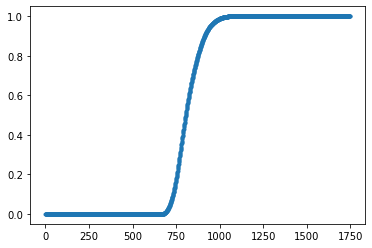

In [6]:
plt.plot(pdat, marker = '.')
plt.show()

In [7]:
best_vals, covar = curve_fit(piecewise_avrami, len(range(len(pdat))), pdat)

C:\Users\jmswe\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [8]:
# Truncate values below some threshold
# Provide data list and threshold 
def truncate_n(dat, n):
    out = []
    for i in range (0, len(dat)):
        if dat[i] < n:
            out.append(dat[i])
        else:
            break
    return out

In [9]:
tdat = truncate_n(pdat,0.3)

In [10]:
x = list(range(0, len(tdat)))
y = tdat

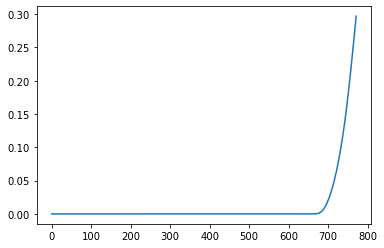

In [11]:
plt.plot(x, y)
plt.show()

In [12]:
import math as math
def piecewise_avrami(x, k, t):
    if x < t:
        return 0
    else:
        return 1-np.exp(-np.power(k*(x-t),2.35675))
#def piecewise_avrami(x, k, t):
#    if x < t:
#        return 0
#    else:
#        return 1-np.exp(-np.power(k*(x-t), 2.35675))

In [13]:
# vectorize avrami 
vect_av = np.vectorize(piecewise_avrami)

In [16]:
def vect_p_av(x, k, t):
    j = np.zeros(x.shape)
    for i in range(0, len(y)):
        j[i] = piecewise_avrami(x[i], k, t)
    return j

In [17]:
best_vals, covar = curve_fit(vect_p_av, x, y)

C:\Users\jmswe\AppData\Local\Temp/ipykernel_23244/2366831191.py:6: RuntimeWarning: invalid value encountered in power
  return 1-np.exp(-np.power(k*(x-t),2.35675))


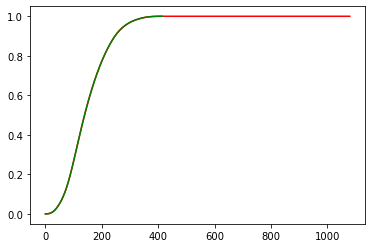

In [18]:
plt.plot(pdat[666:], 'r', data, 'g')
plt.show()

In [19]:
best_vals

array([6.43042099e-03, 6.72028294e+02])

In [20]:
q = []
for i in range(0, len(pdat)):
    q.append(piecewise_avrami(i, best_vals[0], best_vals[1]))

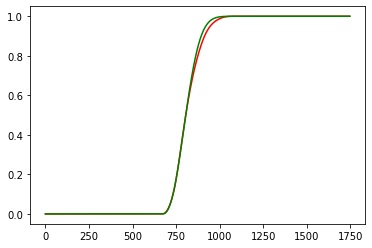

In [21]:
plt.plot(pdat, 'r', q, 'g')
plt.show()

In [22]:
ttdat = truncate_n(q, 0.3)
x1 = list(range(0, len(ttdat)))
y1 = ttdat
best_vals2, covar2 = curve_fit(vect_p_av, x1, y1)

C:\Users\jmswe\AppData\Local\Temp/ipykernel_23244/2366831191.py:6: RuntimeWarning: invalid value encountered in power
  return 1-np.exp(-np.power(k*(x-t),2.35675))


In [23]:
r = []
for i in range(0, len(pdat)):
    r.append(piecewise_avrami(i, best_vals2[0], best_vals2[1]))

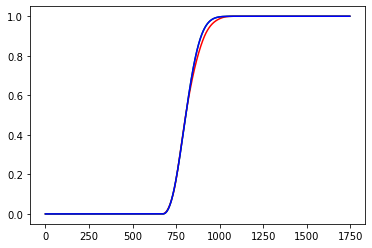

In [24]:
plt.plot(pdat, 'r', q, 'g', r, 'b')
plt.show()

In [25]:
best_vals2

array([6.43042099e-03, 6.72028294e+02])

In [28]:
fitlist = []
for i in range (0, 144):
    emptylist = []
    for j in range (0, len(q)):
        truncate_n(emptylist)

TypeError: truncate_n() missing 1 required positional argument: 'n'

In [29]:
r = pdat
kvals = []
tvals = []
for i in range (0, 10):
    y = truncate_n(r, 0.3)
    x = list(range(0, len(y)))
    best_vals, covar = curve_fit(vect_p_av, x, y)
    tempcurve = []

    for j in range (0, len(q)):
        tempcurve.append(piecewise_avrami(j, best_vals[0], best_vals[1]))
    
    kvals.append(best_vals[0])
    tvals.append(best_vals[1])
    r = tempcurve


C:\Users\jmswe\AppData\Local\Temp/ipykernel_23244/2366831191.py:6: RuntimeWarning: invalid value encountered in power
  return 1-np.exp(-np.power(k*(x-t),2.35675))


In [31]:
tdat = truncate_n(pdat, 0.10)
x = list(range(0, len(tdat)))
y = tdat
best_vals, covar = curve_fit(vect_p_av, x, y, p0 = [1,670])
q = []
for i in range(0, len(pdat)):
    q.append(piecewise_avrami(i, best_vals[0], best_vals[1]))

C:\Users\jmswe\AppData\Local\Temp/ipykernel_23244/2366831191.py:6: RuntimeWarning: invalid value encountered in power
  return 1-np.exp(-np.power(k*(x-t),2.35675))


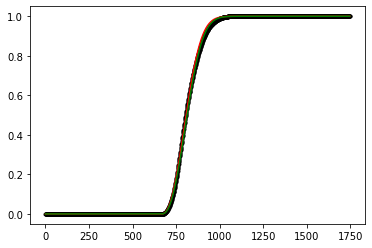

In [32]:
plt.plot(pdat, 'k.',pfit, 'r', q, 'g')
plt.show()

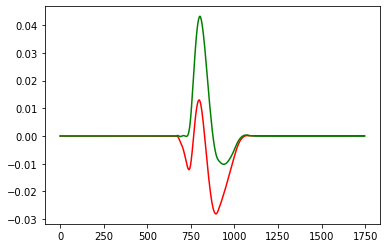

In [33]:
plt.plot(np.subtract(pdat, pfit), 'r',np.subtract(pdat, q), 'g')
plt.show()

In [263]:
plt.plot(q)
plt.show()

array([  5.90574979e-03,   6.67446416e+02])